In [68]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# matplotlib style
plt.style.use('fivethirtyeight')

#### moving average defined

In [20]:
#moving average sentiment
def movingaverage(interval,window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

### entire show general sentiment

In [109]:
got_script = pd.read_csv('/Users/spencerfinkel/Desktop/spring_2020/lis4761/GoTAnalysis/sentiment-csvs/all_sentiment.csv', dtype={'Release Date':str, 'Season': int, 'Episode': int, 'Episode Title': str, 'Name':str, 'Sentence': str, 'neg':float, 'neu':float, 'pos': float, 'compoud': float})
sampled_got_script = pd.read_csv('/Users/spencerfinkel/Desktop/spring_2020/lis4761/GoTAnalysis/sentiment-csvs/sampled_all_sentiment.csv', dtype={'Release Date':str, 'Season': int, 'Episode': int, 'Episode Title': str, 'Name':str, 'Sentence': str, 'neg':float, 'neu':float, 'pos': float, 'compoud': float})
sampled_got_script = sampled_got_script.sort_values(by=['Season','Episode'])
sampled_got_script.head

<bound method NDFrame.head of     Release Date     Episode Title    pos    neg    neu  compound  Episode  \
17    17/04/2011  Winter is Coming  0.173  0.000  0.827    0.5896        1   
86    17/04/2011  Winter is Coming  0.000  0.000  1.000    0.0000        1   
154   17/04/2011  Winter is Coming  0.000  0.000  1.000    0.0000        1   
89    24/04/2011     The Kingsroad  0.000  0.000  1.000    0.0000        2   
224   24/04/2011     The Kingsroad  0.472  0.000  0.528    0.8625        2   
..           ...               ...    ...    ...    ...       ...      ...   
181   12/05/2019         The Bells  0.315  0.000  0.685    0.3182        5   
92    19/05/2019   The Iron Throne  0.096  0.000  0.904    0.5106        6   
127   19/05/2019   The Iron Throne  0.474  0.000  0.526    0.4019        6   
132   19/05/2019   The Iron Throne  0.000  0.000  1.000    0.0000        6   
193   19/05/2019   The Iron Throne  0.075  0.255  0.670   -0.8860        6   

     Season                Name  

In [160]:
show_means = sampled_got_script.groupby('Season')['compound'].mean()
show_counts = sampled_got_script.groupby('Season')['Season']

show_season_indis = []
show_season_start_values = []
for i in range(1,9):
    season = [a for a in sampled_got_script.index[sampled_got_script['Season']==i]]
    
    show_season_indis.append(season)
    show_season_start_values.append(season[0])
show_season_start_values = sorted(show_season_start_values)
show_xshape = list(range(0,len(sampled_got_script)))
print('Entire Show')
print(show_means)
print(round(show_means.mean(),4))

Entire Show
Season
1    0.105070
2    0.113787
3    0.052545
4    0.049064
5    0.074429
6   -0.029375
7    0.034062
8    0.044131
Name: compound, dtype: float64
0.0555


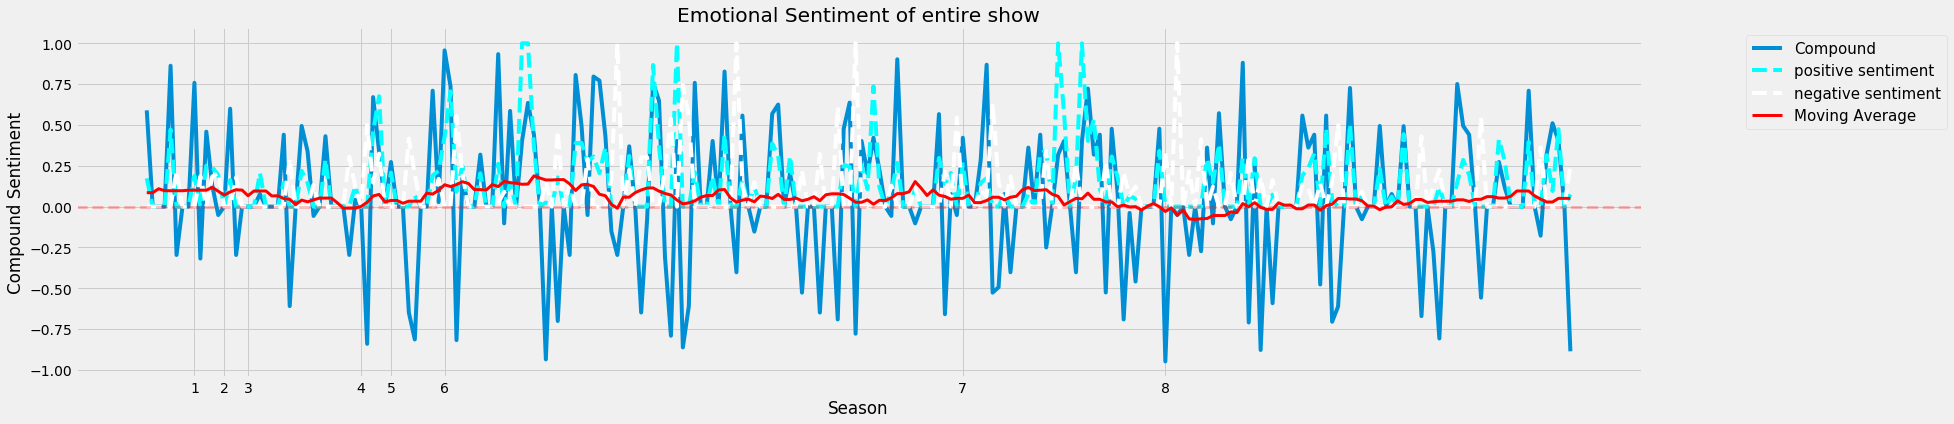

In [113]:
length = 8
x = np.linspace(1,8,num=length)
y = show_means

plt.figure(figsize=(25,6))
plt.plot(show_xshape,sampled_got_script['compound'], label='Compound')
plt.plot(show_xshape,sampled_got_script['pos'], color='cyan', linestyle='dashed', label='positive sentiment')
plt.plot(show_xshape,sampled_got_script['neg'], color='white', linestyle='dashed', label='negative sentiment')
plt.plot(movingaverage(sampled_got_script['compound'],25),color='red', linewidth=3, linestyle='-', label='Moving Average')
tck_labels = list(range(1,9))
plt.xticks(show_season_start_values, tck_labels)
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)

#for i in jon_season_indis:
#    plt.plot(x,y)

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title('Emotional Sentiment of entire show')
plt.xlabel('Season')
plt.ylabel('Compound Sentiment')
plt.show()

## Jon

In [187]:
jon = pd.read_csv('/Users/spencerfinkel/Desktop/spring_2020/lis4761/GoTAnalysis/sentiment-csvs/towardJon.csv', dtype={'Release Date':str, 'Season': int, 'Episode': int, 'Episode Title': str, 'Name':str, 'Sentence': str, 'neg':float, 'neu':float, 'pos': float, 'compoud': float})
jon = jon.sort_values(by=['Season','Episode'])
jon

,Release Date,Episode Title,pos,neg,neu,compound,Season,Episode,Name,Sentence
0,17/04/2011,Winter is Coming,0.000,0.000,1.000,0.0000,1,1,bran stark,Jon said he was a deserter.
1,17/04/2011,Winter is Coming,0.232,0.359,0.409,-0.4215,1,1,benjen,"Well, you're always welcome on the wall. No ba..."
2,17/04/2011,Winter is Coming,0.000,0.000,1.000,0.0000,1,1,benjen,Jon…
3,17/04/2011,Winter is Coming,0.268,0.223,0.510,0.1779,1,1,tyrion lannister,My greatest accomplishment. You – you're Ned S...
4,17/04/2011,Winter is Coming,0.000,0.538,0.462,-0.7184,1,1,tyrion lannister,"Did I offend you? Sorry. You are the bastard, ..."
...,...,...,...,...,...,...,...,...,...,...
475,19/05/2019,The Iron Throne,0.094,0.000,0.906,0.4019,8,6,yara greyjoy,She freed us from a tyrant. Cersei is gone bec...
476,19/05/2019,The Iron Throne,0.199,0.158,0.643,0.1774,8,6,grey worm,We do not need payment. We need justice. Jon S...
477,19/05/2019,The Iron Throne,0.199,0.158,0.643,0.1774,8,6,grey worm,We do not need payment. We need justice. Jon S...
478,19/05/2019,The Iron Throne,0.129,0.147,0.724,-0.1779,8,6,tyrion lannister,You're right. And no one's any better for it. ...


In [193]:
jon_means = jon.groupby('Season')['compound'].mean()
jon_counts = jon.groupby('Season')['Season']

jon_season_indis = []
jon_season_start_values = []
for i in range(1,9):
    season = [a for a in jon.index[jon['Season']==i]]

    jon_season_indis.extend(season)

    jon_season_start_values.append(season[0])



jon_season_start_values = sorted(jon_season_start_values)
print(jon_season_start_values)
jon_xshape = list(range(0,len(jon)))
print('jon Sentiment')
print(jon_means)
print(round(jon_means.mean(),4))

[0, 37, 86, 137, 198, 252, 323, 445]
jon Sentiment
Season
1   -0.214276
2   -0.230500
3   -0.174824
4   -0.153748
5   -0.135565
6   -0.245165
7   -0.049892
8    0.013903
Name: compound, dtype: float64
-0.1488


In [5]:
#sbn.catplot(data=jon, x='Season', y='compound', kind='box', palette="husl")
#plt.show()

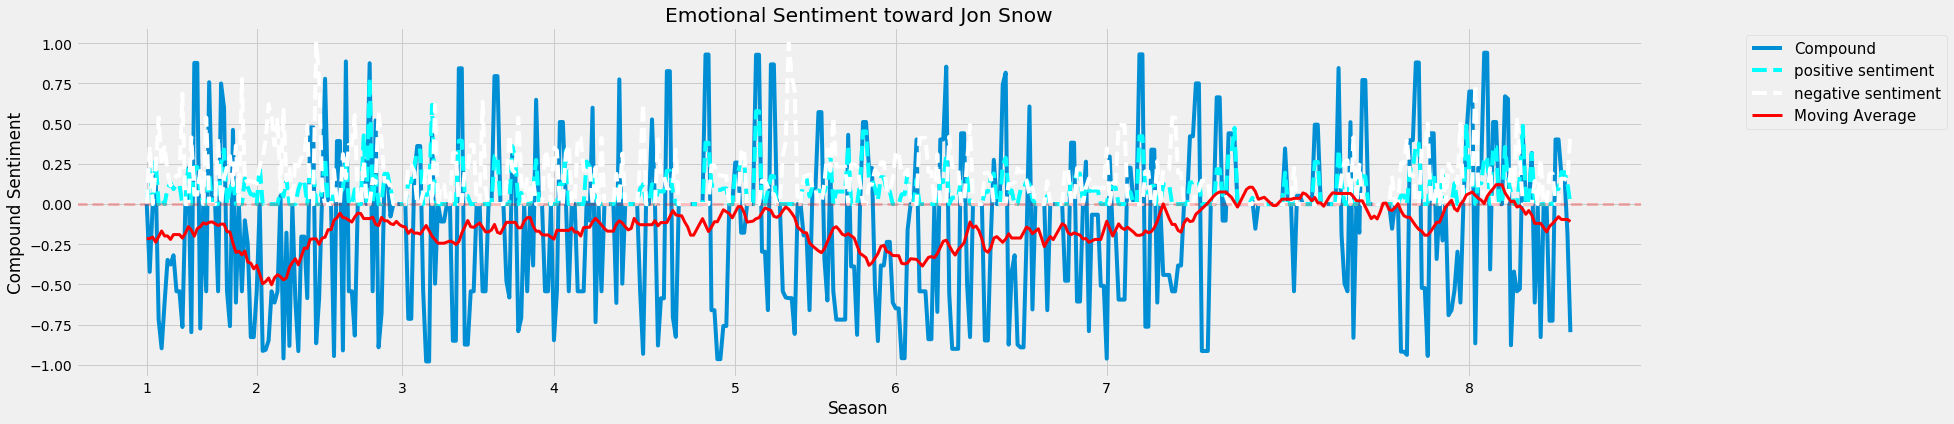

In [208]:
length = 8
#x = np.linspace(1,8,num=length)
y = jon_means


plt.figure(figsize=(25,6))
plt.plot(jon_xshape,jon['compound'], label='Compound')
plt.plot(jon_xshape,jon['pos'], color='cyan', linestyle='dashed', label='positive sentiment')
plt.plot(jon_xshape,jon['neg'], color='white', linestyle='dashed', label='negative sentiment')
plt.plot(movingaverage(jon['compound'],25),color='red', linewidth=3, linestyle='-', label='Moving Average')
tck_labels = list(range(1,9))
plt.xticks(jon_season_start_values, tck_labels)
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)

#for i in jon_season_indis:
#    plt.plot(x,y)

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title('Emotional Sentiment toward Jon Snow')
plt.xlabel('Season')
plt.ylabel('Compound Sentiment')
plt.show()

### Jon extreme values and correlations to major events

In [239]:
jon_extreme = pd.read_csv('/Users/spencerfinkel/Desktop/spring_2020/lis4761/GoTAnalysis/sentiment-csvs/jon_extreme.csv', dtype={'Release Date':str, 'Season': int, 'Episode': int, 'Episode Title': str, 'Name':str, 'Sentence': str, 'neg':float, 'neu':float, 'pos': float, 'compoud': float})

jon_extreme['Season'].unique()
jon_counts = jon_extreme.groupby('Season')['Season']
jon_season_indis = []
jon_season_start_values = []
for i in range(1,9):
    season = [a for a in jon_extreme.index[jon_extreme['Season']==i]]

    jon_season_indis.extend(season)

    jon_season_start_values.append(season[0])



jon_season_start_values = sorted(jon_season_start_values)
jon_xshape = list(range(0,len(jon_extreme)))

print(jon_extreme[['Season','Episode','Sentence','compound','Name']].to_string())

    Season  Episode                                           Sentence  compound               Name
0        1        1  And Lady Stark is not your mother. Making you ...   -0.8967   tyrion lannister
1        1        4  Looks like the bastardo s in love. All right t...    0.8779     alliser thorne
2        1        4  Looks like the bastardo s in love. All right t...    0.8779     alliser thorne
3        1       10  l'll not sit meekly by and wait for the snows....   -0.8271       jeor mormont
4        1       10  l'll not sit meekly by and wait for the snows....   -0.8271       jeor mormont
5        2        1  You're held captive by a boy. Perhaps you'll b...   -0.9129         robb stark
6        2        1  I'm asking if he fucked other women when he gr...   -0.9062  joffrey lannister
7        2        1             Enough. Get it done. Kill the bastard.   -0.8481              janos
8        2        2  No, but who else would want to murder King Rob...   -0.9595   tyrion lannister


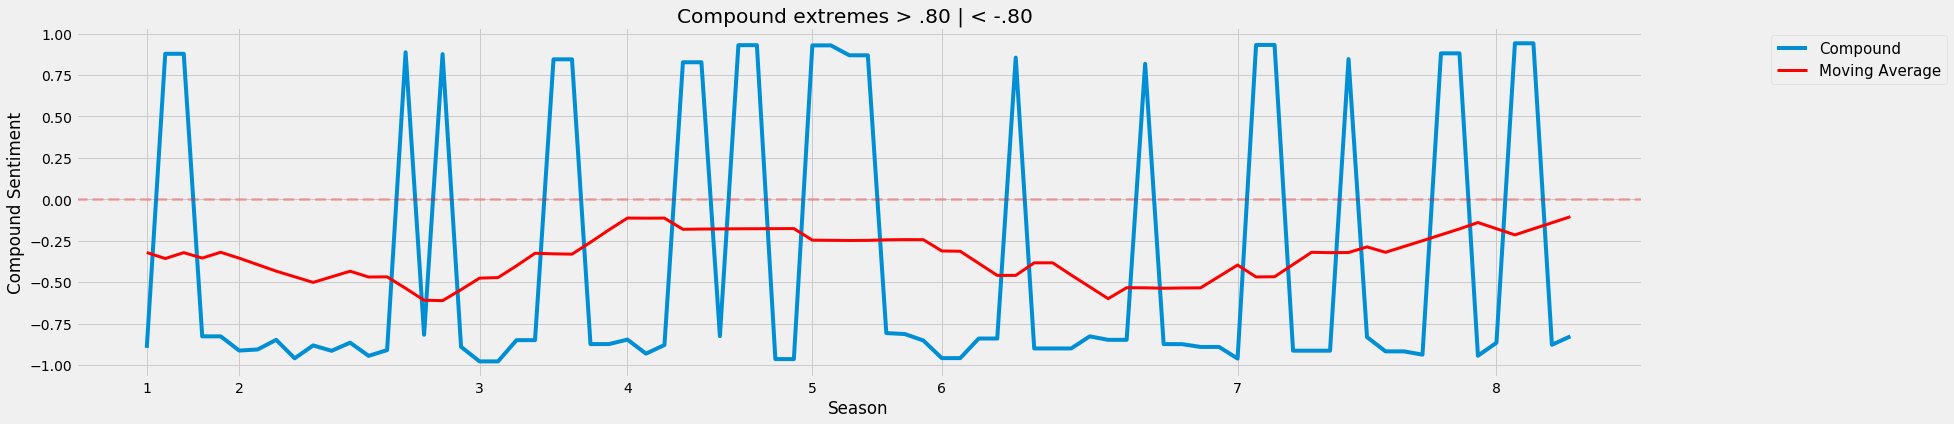

In [226]:

plt.figure(figsize=(25,6))
plt.plot(jon_xshape,jon_extreme['compound'], label='Compound')
#plt.plot(jon_xshape,jon['pos'], color='cyan', linestyle='dashed', label='positive sentiment')
#plt.plot(jon_xshape,jon['neg'], color='white', linestyle='dashed', label='negative sentiment')
plt.plot(movingaverage(jon_extreme['compound'],25),color='red', linewidth=3, linestyle='-', label='Moving Average')
tck_labels = list(range(1,9))
plt.xticks(jon_season_start_values, tck_labels)
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)

#for i in jon_season_indis:
#    plt.plot(x,y)

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title('Compound extremes > .80 | < -.80 ')
plt.xlabel('Season')
plt.ylabel('Compound Sentiment')
plt.show()

### Jon has such a negative sentiment... why?

In [163]:
unhappy_frame = got_script[got_script.Sentence.str.contains('kill|dead|battle|blood|death|murder',case=False)]
total_unhappy = len(unhappy_frame)
jon_unhappy = unhappy_frame[unhappy_frame.Sentence.str.contains('Jon|Jon Snow| Lord Snow|Bastard of Winterfell|King Crow|White Wolf|Bastard')]
dany_unhappy = unhappy_frame[unhappy_frame.Sentence.str.contains('Daenerys|Dany|Unburnt|Silver Lady|Dragon mother|dragon queen|Breaker of Chains|Mother of Dragons|Stormborn|Mhysa')]
cersei_unhappy = unhappy_frame[unhappy_frame.Sentence.str.contains('Cersei|Queen Regent|Queen Mother|Lady of Casterly Rock|our sister')]
#total_unhappy/len(jon_unhappy)
print('Jon: ',len(jon_unhappy)/total_unhappy)
print('Dany: ',len(dany_unhappy)/total_unhappy)
print('Cersei: ',len(cersei_unhappy)/total_unhappy)

Jon:  0.028272894898586354
Dany:  0.00921942224953903
Cersei:  0.027658266748617086


## Dany

In [11]:
dany = pd.read_csv('/Users/spencerfinkel/Desktop/spring_2020/lis4761/GoTAnalysis/sentiment-csvs/towardDany.csv', dtype={'Release Date':str, 'Season': int, 'Episode': int, 'Episode Title': str, 'Name':str, 'Sentence': str, 'neg':float, 'neu':float, 'pos': float, 'compoud': float})

In [164]:
dany_means = dany.groupby('Season')['compound'].mean()
dany_counts = dany.groupby('Season')['Season']

dany_season_start_values = []
for i in range(1,9):
    season = [a for a in dany.index[dany['Season']==i]]
    dany_season_start_values.append(season[0])
print(dany_season_start_values)

dany_xshape = list(range(0,len(dany)))
print('Dany Sentiment')
print(dany_means)
print(round(dany_means.mean(),4))

[0, 12, 32, 50, 69, 92, 130, 193]
Dany Sentiment
Season
1    0.133042
2    0.084635
3    0.333550
4    0.149800
5    0.100943
6    0.108353
7   -0.023829
8   -0.130416
Name: compound, dtype: float64
0.0945


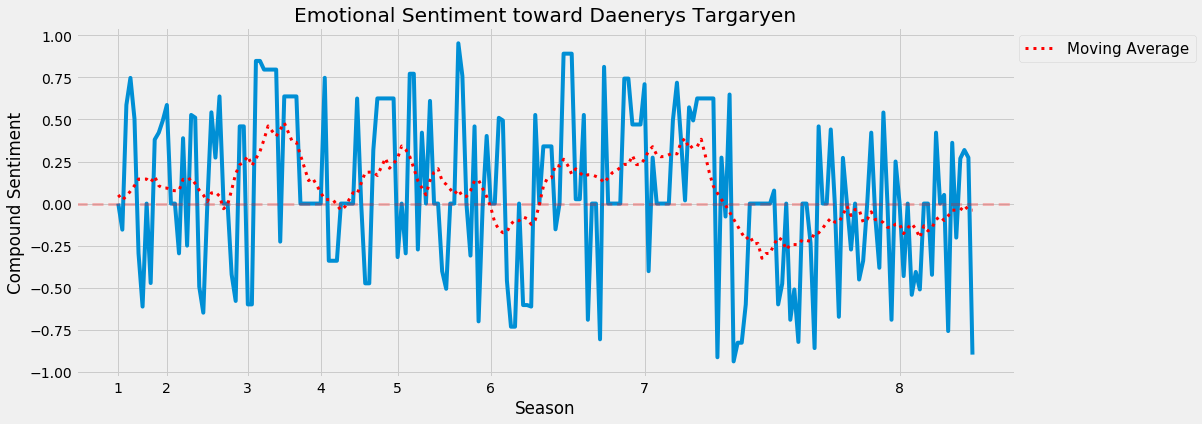

In [200]:
y = dany_means

plt.figure(figsize=(15,6))
plt.plot(dany_xshape,dany['compound'])
#plt.plot(dany_xshape,dany['pos'], color='cyan', linestyle='dashed', label='positive sentiment')
#plt.plot(dany_xshape,dany['neg'], color='white', linestyle='dashed', label='negative sentiment')
#plt.plot(dany_xshape,dany['neg'], color='purple')
plt.plot(movingaverage(dany['compound'],15),color='red', linewidth=3, linestyle=':', label='Moving Average')
tck_labels = list(range(1,9))
plt.xticks(dany_season_start_values, tck_labels)
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
#plt.plot(x,y)

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title('Emotional Sentiment toward Daenerys Targaryen')
plt.xlabel('Season')
plt.ylabel('Compound Sentiment')

plt.show()

## Cersei

In [37]:
cersei = pd.read_csv('/Users/spencerfinkel/Desktop/spring_2020/lis4761/GoTAnalysis/sentiment-csvs/towardCersei.csv', dtype={'Release Date':str, 'Season': int, 'Episode': int, 'Episode Title': str, 'Name':str, 'Sentence': str, 'neg':float, 'neu':float, 'pos': float, 'compoud': float})

In [165]:
cersei_means = cersei.groupby('Season')['compound'].mean()
cersei_counts = cersei.groupby('Season')['Season']

cersei_season_start_values = []
for i in range(1,9):
    season = [a for a in cersei.index[cersei['Season']==i]]
    cersei_season_start_values.append(season[0])
print(cersei_season_start_values)

cersei_xshape = list(range(0,len(cersei)))
print('Cersei Sentiment')
print(cersei_means)
print(round(cersei_means.mean(),4))

[0, 7, 29, 35, 55, 80, 101, 159]
Cersei Sentiment
Season
1   -0.143543
2    0.155023
3   -0.021767
4   -0.089845
5    0.071384
6    0.070867
7   -0.043764
8   -0.079842
Name: compound, dtype: float64
-0.0102


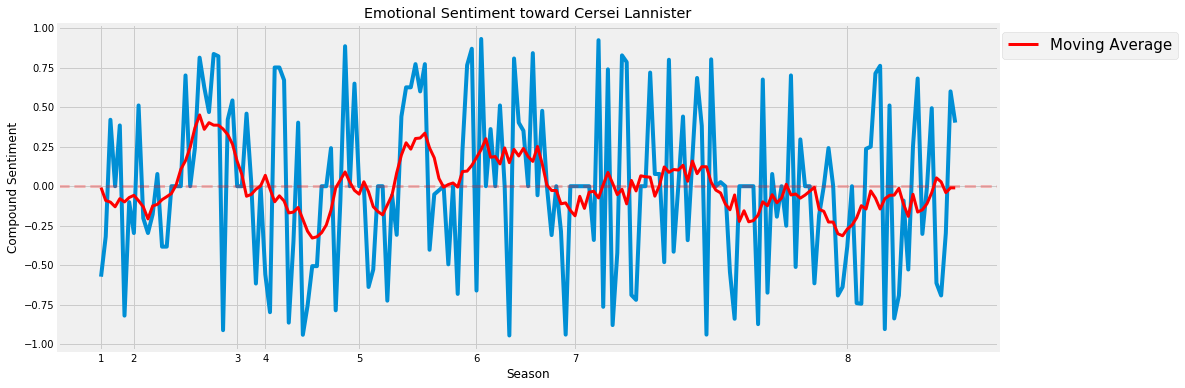

In [39]:
plt.figure(figsize=(15,6))
plt.plot(cersei_xshape,cersei['compound'])
plt.plot(movingaverage(cersei['compound'],10),color='red', linewidth=3, linestyle='-', label='Moving Average')
tck_labels = list(range(1,9))
plt.xticks(cersei_season_start_values, tck_labels)
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title('Emotional Sentiment toward Cersei Lannister')
plt.xlabel('Season')
plt.ylabel('Compound Sentiment')

plt.show()